In [44]:
#IMPORT
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Load data into dataframe 
data=pd.read_csv("./csv_files/lr-Real-estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [46]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [48]:
#condition=data.duplicated()
data[data.duplicated()]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [49]:
#check if dataframe has null values
#can be checked from above information
data.isnull().sum()     #isnull le garda value false aucha so 0 aucha 

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [50]:
#check the value of duplicated values
data.duplicated().sum()

0

In [51]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

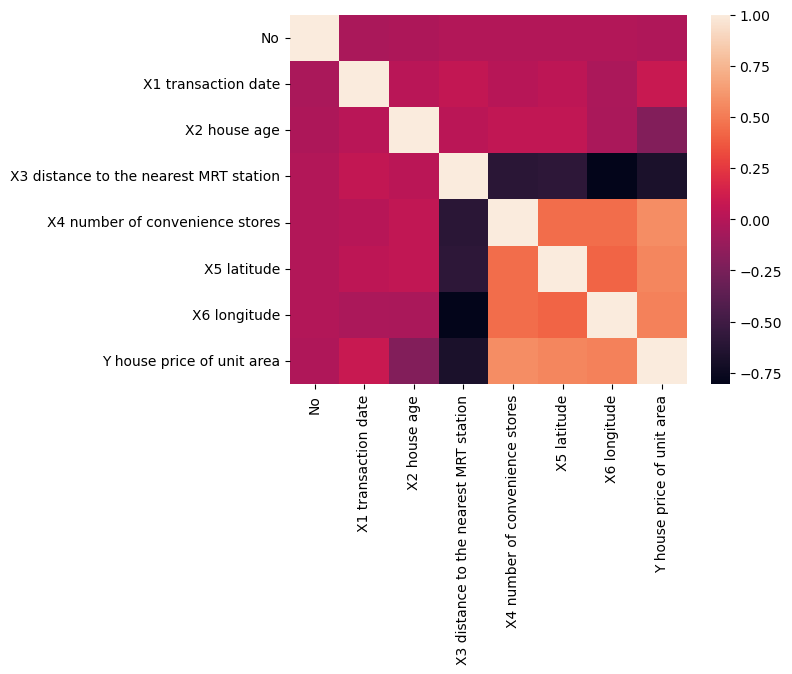

In [52]:
#annot= to write value into the cell
#camp= 
sns.heatmap(data.corr())#,annot=True , cmap="Blues")

<Axes: >

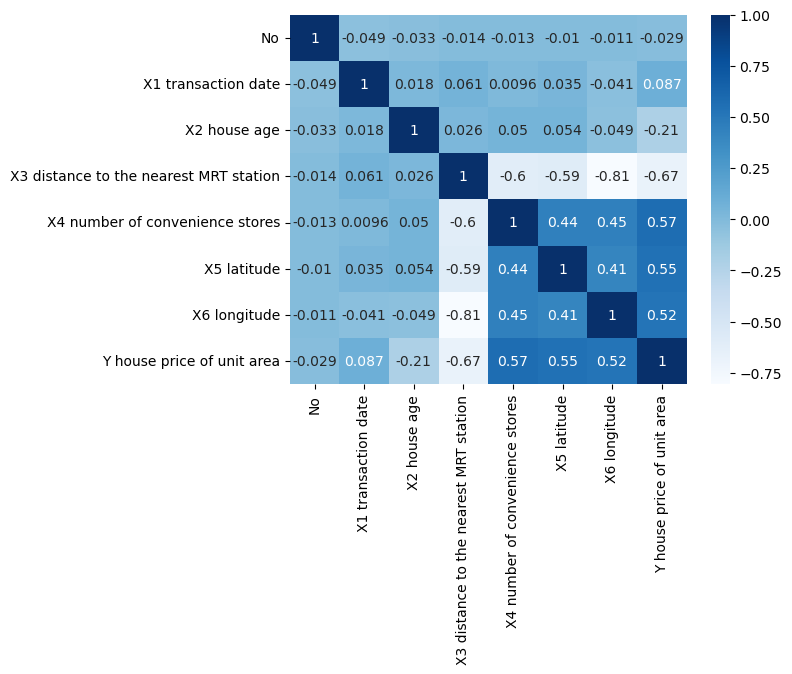

In [53]:
import seaborn as sns
data=pd.read_csv("./csv_files/lr-Real-estate.csv")
sns.heatmap(data.corr(),annot=True , cmap="Blues")

In [54]:
# Thus dropping other independent features
data.drop(['No','X1 transaction date'],axis=1, inplace=True)
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [55]:
#splitting the dependent and independent features.

X=data.drop(['Y house price of unit area'],axis=1)
y=data['Y house price of unit area']
print(X)

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  X6 longitude  
0                                 10     24.98298     121.54024  
1                                  9     24.98034     121.53951  
2                                  5     24.98746     121.54391  
3  

In [56]:
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [57]:
# Splitting data into train and test sets for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=42                #sab row lai 100 percent manne ani 80 and 20 plus is 100 20% is in test and 80% goes to train
                                                        #random state is like suffuling cards random state 42 means jaile autai order ma bascha data haru 
                                                        
)

In [58]:
#check the shape of the splited sets
X_train.shape,X_test.shape          #414 ma 88%of 414 =332 train ma gayo
                                    #20% of 414 =83 test ma gayo 

((331, 5), (83, 5))

In [59]:
#training the model
lr_model=LinearRegression()

In [60]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [61]:
pd.DataFrame(lr_model.coef_,X.columns,columns=['coeficient'])

,coeficient
X2 house age,-0.270593
X3 distance to the nearest MRT station,-0.004552
X4 number of convenience stores,1.105121
X5 latitude,236.092831
X6 longitude,-23.903694


In [62]:
#prediction
y_pred=lr_model.predict(X_test)
y_pred

array([47.74180481, 41.95484652, 44.5399885 , 41.33697932, 30.28548   ,
       42.84474934, 45.98717123, 45.90599326, 24.78369465, 52.02068924,
       32.23880597, 34.77542016, 39.51392044, 24.90203898, 35.73984968,
       32.99552705, 41.96863217, 46.98662328, 31.50100311, 44.49258341,
        2.21362693, 33.64381059, 47.764103  , 43.56374399, 14.07301949,
       41.29883092, 14.73315281, 44.5399885 , 36.13972668, 37.76019401,
       11.66211419, 39.22848089, 37.83881729, 28.61334713, 45.93500741,
       31.52925298, 52.2101045 , 15.18188713, 46.84531477, 40.47464938,
       36.01694465, 40.58052131, 48.38869976, 39.8943259 , 42.00896517,
       48.22742934, 45.07252677, 23.5290158 , 49.9849698 , 48.13933326,
       47.74180481, 48.54209921, 40.94754085, 42.54642454, 36.38766353,
       15.15482781, 35.13348041, 36.39866246, 30.20430203, 45.90599326,
       33.69672647, 32.65567761, 15.15482781, 11.8739673 ,  8.74877596,
       33.67086991, 29.81801432, 45.24751413, 34.2425491 , 30.54

In [63]:
#check the predictions with respect to ground truth 
com=pd.DataFrame({'y_test':y_test,'y_pred':y_pred}).reset_index(drop=True)
com

,y_test,y_pred
0,45.1,47.741805
1,42.3,41.954847
2,52.2,44.539989
3,37.3,41.336979
4,22.8,30.285480
...,...,...
78,25.0,42.713577
79,23.5,31.929172
80,35.6,41.893452
81,46.1,46.068349


In [64]:
len_test=len(y_pred)
default_arr=np.array(range(len_test))
default_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [65]:
len_test=len(y_pred)
rng_tst=range(len_test)
list(rng_tst)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82]

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

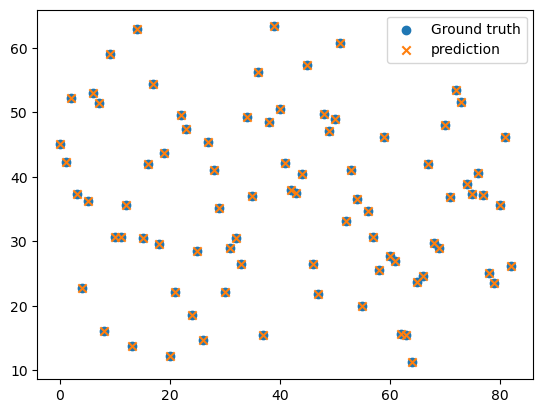

In [66]:
import matplotlib.pyplot as plt
plt.scatter(default_arr,y_test,marker='o',label="Ground truth")
plt.scatter(default_arr,y_test,marker='x',label="prediction")
plt.legend()
plt.grid

In [67]:
#check accuracy of the model on test set 
lr_model.score (X_test,y_test)

0.6746481382828187

In [68]:
#Evaluating the model 
from sklearn import metrics
import numpy as np


In [69]:
MSE =metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)


In [70]:
MSE

54.58094520086193

In [71]:
RMSE

7.387891796775446

Classification
-> used to classify wheather the features with particular values belong to dostint class

Logistic RAEGRESSION

->algorithm used for binary classification task
->Estimates the probability that an instance belongs to particular class 
-> probability greater or equal to 50% represents the positive class

In [72]:
##Scikit-learn implementation 
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [73]:
data=pd.read_csv("./csv_files/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [90]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (X,y, test_size=0.20, random_state=33)

In [92]:
classify_model=LogisticRegression()
classify_model.fit(X_train,y_train)

c:\Users\HP\anacondaa\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
preds=classify_model.predict(X_test)

In [ ]:
data[data.duplicated()] #data.duplicated() le boolean value dincha

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [ ]:
data[data['X2 house age'] == 11] #X2 house age ma 11 bhako value dekhaucha

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
60,61,2013.417,11.0,1931.207,2,24.96365,121.51471,21.3
240,241,2013.083,11.0,1712.632,2,24.96412,121.51670,28.8


In [ ]:
data.isnull().sum() #isnull le null value dekhaucha anii yesle chaii kunai row ma katii ota null value cha add garcha


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [94]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,preds))


[[87 12]
 [29 26]]


<Axes: >

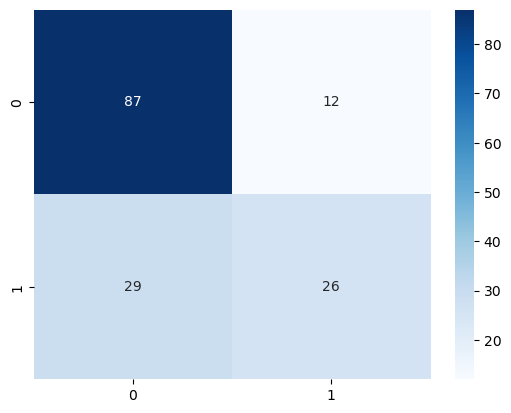

In [97]:
import seaborn as sns 
sns.heatmap(confusion_matrix(y_test,preds),cmap="Blues",annot=True)

In [96]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,preds))

0.7337662337662337
